In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches


In [3]:
# Read in both the CSV files to do EDA
df_wf = pd.read_csv('../../src/data/zillow_data.csv')
df_lf = pd.read_csv('../../src/data/zillow_data_lf.csv')
df_lf.time = pd.to_datetime(df_lf.time)

# Look at Entire country house prices over the last 22 years (1996 - 2018)

In [4]:
df_country = df_lf.groupby('time').aggregate({'value':'mean'}).reset_index()
df_country.head(5)

,time,value
0,1996-04-01,118299.123063
1,1996-05-01,118419.044139
2,1996-06-01,118537.423268
3,1996-07-01,118653.069278
4,1996-08-01,118780.254312


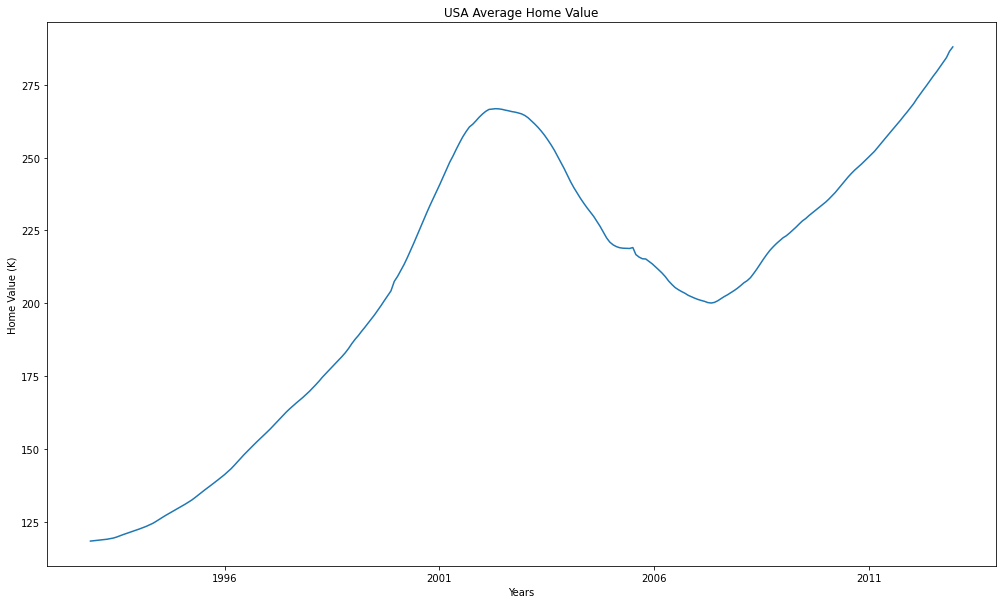

In [5]:
fig, ax = plt.subplots(figsize = (17,10))
ax = sns.lineplot(data=df_country, x="time", y="value");
#sns.set_context(context= 'poster', font_scale = 1);
ax.set(xlabel = 'Years', ylabel = "Home Value (K)",title = 'USA Average Home Value');
locator = MaxNLocator(nbins=5) # with 3 bins you will have 4 ticks
ax.xaxis.set_major_locator(locator)
ax.set_xticklabels(['filler',1996,2001,2006,2011,2016]);
ax.set_yticklabels(list(range(100,300,25)));

The financial bubble that happened in 2008 is shown on the graph. That was the peak of the bubble. It stedily decreased til about 2012 before the market started picking up again and not until about 2016 was the market the same. For our modeling it might be wise to avoid using the data before 2010 because it will prevent us from making an accurate model. 

# Looking at states 

In [121]:
# Create a Dataframe for each state groupby the value
state_info = pd.DataFrame(columns = ['State','growth_rate'])
start_date = '2015-01-01'
end_date = '2018-01-01'


for state in df_lf.State.unique():
    locals()[str(state)]= df_lf[df_lf.State == state].groupby('time').aggregate({'value':'mean'}).reset_index()

    past = float(locals()[str(state)][locals()[str(state)].time ==start_date].value)
    present = float(locals()[str(state)][locals()[str(state)].time == end_date].value)
    growth = ((present-past)/past)*100  # growth rate percentage over last year_diff
    state_info = state_info.append({'State':state,'growth_rate':growth},ignore_index=True)

In [95]:
state_info.sort_values(by=['growth_rate'], ascending = False).reset_index(drop = True).head(15)

,State,growth_rate
0,WA,40.686769
1,OR,31.909347
2,NV,31.028401
3,CO,29.670447
4,FL,29.361386
5,CA,27.264803
6,UT,26.995342
7,ID,25.613626
8,TN,23.719354
9,MI,22.893605


In [274]:
for state in [CO, WA, OR, NV, TN, UT, ID, MN]:
    state['value_scaled'] = (100*((state.value/state.value[0])-1))

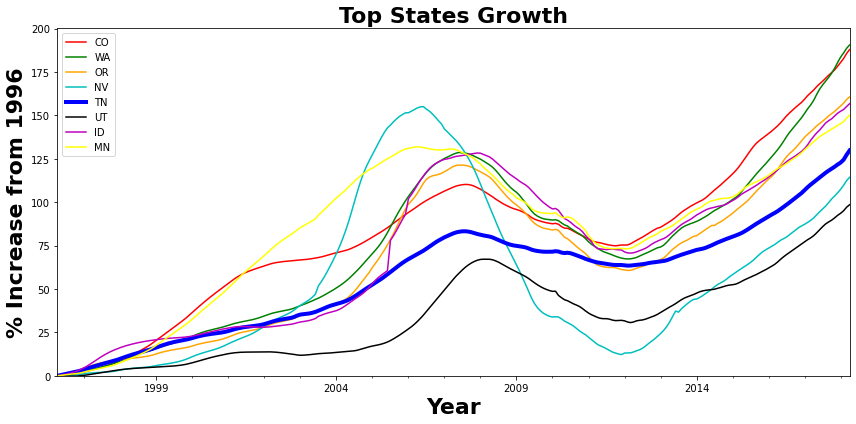

In [280]:
# Plotting some of the states against eachother 
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(12,6))
#Top 5
CO.plot(kind='line', x='time', y='value_scaled', color='red',label = 'CO', ax=ax)
WA.plot(kind='line', x='time', y='value_scaled', color='green',label = 'WA', ax=ax)
OR.plot(kind='line', x='time', y='value_scaled', color='orange',label = 'OR', ax=ax)
NV.plot(kind='line', x='time', y='value_scaled', color='c',label = 'NV', ax=ax)

#Middle of pack
TN.plot(kind='line', x='time', y='value_scaled', color='blue',label = 'TN', ax=ax, linewidth=4)
UT.plot(kind='line', x='time', y='value_scaled', color='k',label = 'UT', ax=ax)
ID.plot(kind='line', x='time', y='value_scaled', color='m',label = 'ID', ax=ax)
MN.plot(kind='line', x='time', y='value_scaled', color='yellow',label = 'MN', ax=ax)
ax.set_ylim(ymin=0)

font = {'weight' : 'bold',
            'size'   : 22}
ax.set_ylim(ymin=0)
plt.title('Top States Growth', fontdict = font)
plt.xlabel('Year', fontdict = font)
plt.ylabel('% Increase from 1996',fontdict = font)
plt.tight_layout()
plt.savefig('../report/figures/top_growing_state', dpi = 300)

plt.show()

# Metro Areas in TN

In [157]:
TN_df = df_lf[df_lf.State == 'TN']

In [158]:
TN_df =TN_df.dropna()

In [173]:
metro_info = pd.DataFrame(columns = ['Metro','growth_rate'])
start_date = '2014-01-01'
end_date = '2018-01-01'

for metro in TN_df.Metro.unique():
    locals()[str(metro)]= TN_df.loc[TN_df.Metro == metro].groupby('time').aggregate({'value':'mean'}).reset_index()

    past = float(locals()[str(metro)][locals()[str(metro)].time ==start_date].value)
    present = float(locals()[str(metro)][locals()[str(metro)].time == end_date].value)
    growth = ((present-past)/past)*100  # growth rate percentage over last year_diff
    metro_info = metro_info.append({'Metro':metro,'growth_rate':growth},ignore_index=True)

In [184]:
metro_info.sort_values(by=['growth_rate'], ascending = False).reset_index(drop = True).head(5)

,Metro,growth_rate
0,Lewisburg,47.873900
1,Nashville,45.776356
2,Shelbyville,45.689342
3,McMinnville,32.260908
4,Cookeville,28.463975


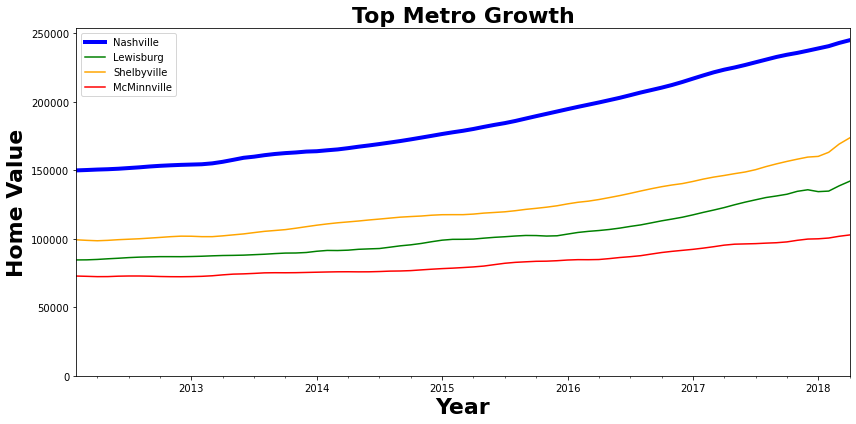

In [279]:
# Plotting some of the states against eachother 
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(12,6))
#Top 4
Nashville.tail(75).plot(kind='line', x='time', y='value', color='blue',label = 'Nashville', ax=ax, linewidth = 4)
Lewisburg.tail(75).plot(kind='line', x='time', y='value', color='green',label = 'Lewisburg', ax=ax)
Shelbyville.tail(75).plot(kind='line', x='time', y='value', color='orange',label = 'Shelbyville', ax=ax)
McMinnville.tail(75).plot(kind='line', x='time', y='value', color='red',label = 'McMinnville', ax=ax)

font = {'weight' : 'bold',
            'size'   : 22}

plt.title('Top Metro Growth', fontdict = font)
plt.xlabel('Year', fontdict = font)
plt.ylabel('Home Value',fontdict = font)
plt.tight_layout()
ax.set_ylim(ymin=0)
plt.savefig('../report/figures/top_growing_Metro', dpi = 300)
plt.show()

# Zipcodes of Nashville

In [179]:
TN_zip = df_lf[df_lf.Metro == 'Nashville']

In [197]:
zipcode_info = pd.DataFrame(columns = ['zipcode','growth_rate'])
start_date = '2014-01-01'
end_date = '2018-01-01'

for zipcode in TN_zip.RegionName.unique():
    past = float(locals()[str(zipcode)][locals()[str(zipcode)].time ==start_date].value)
    present = float(locals()[str(zipcode)][locals()[str(zipcode)].time == end_date].value)
    growth = ((present-past)/past)*100  # growth rate percentage over last year_diff
    zipcode_info = zipcode_info.append({'zipcode':zipcode,'growth_rate':growth},ignore_index=True)
    zipcode_info.zipcode = zipcode_info.zipcode.astype('int64')

In [214]:
top_zips_tn = zipcode_info.sort_values(by=['growth_rate'], ascending = False).reset_index(drop = True).head(5)

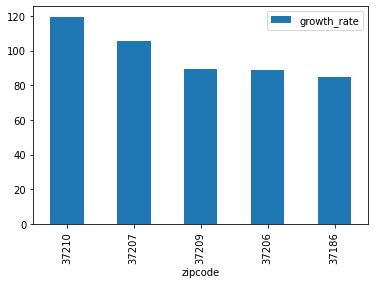

In [217]:
top_zips_tn.plot(x='zipcode', y='growth_rate', kind = 'bar');


In [236]:
from numpy import asarray
zip_data = asarray(TN_zip.RegionName.unique())

In [237]:
from numpy import asarray
from numpy import save
# define data
# save to npy file
save('../../src/data/zip_data.npy', zip_data)